In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [184]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


### Checking for unique labels

In [185]:
df.label.unique()

array(['neg', 'pos'], dtype=object)

In [186]:
df.isna().sum()

label      0
review    35
dtype: int64

Getting rid of na values as empty reviews cant be substituted.

In [187]:
df = df.dropna()

In [188]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


Checking the counts of each label

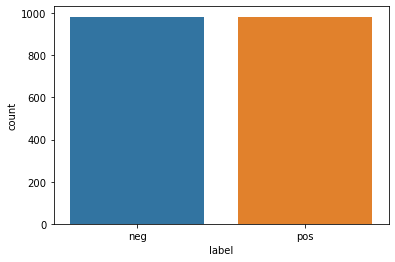

In [189]:
sns.countplot(data=df, x='label');

In [190]:
#df['length'] = len(df.iloc[:,'review'])
df['length'] = df['review'].apply(lambda x:len(x))

In [191]:
df[df['length']<5]  # these review cells have only empty spaces

,label,review,length
57,neg,,2
71,pos,,2
147,pos,,2
151,pos,,2
283,pos,,2
307,pos,,2
313,neg,,2
323,pos,,2
343,pos,,2
351,neg,,2


In [192]:
df = df[df['length']>3]
df

,label,review,length
0,neg,how do films like mouse hunt get into theatres...,2250
1,neg,some talented actresses are blessed with a dem...,3503
2,pos,this has been an extraordinary year for austra...,3869
3,pos,according to hollywood movies made in last few...,5584
4,neg,my first press screening of 1998 and already i...,4327
...,...,...,...
1995,pos,"i like movies with albert brooks , and i reall...",6835
1996,pos,it might surprise some to know that joel and e...,4026
1997,pos,the verdict : spine-chilling drama from horror...,5010
1998,pos,i want to correct what i wrote in a former ret...,3424


#### looks like a balanced dataset
---
## Train|test split

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [196]:
tfidf = TfidfVectorizer(stop_words='english')

In [197]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [198]:
X_test = tfidf.transform(X_test)
X_train = tfidf.transform(X_train)

In [199]:
from sklearn.linear_model import LogisticRegressionCV

In [200]:
lr_model = LogisticRegressionCV(max_iter=100000)

In [201]:
lr_model.fit(X_train,y_train)
preds = lr_model.predict(X_test)

In [202]:
from sklearn.metrics import classification_report, plot_confusion_matrix

              precision    recall  f1-score   support

         neg       0.87      0.76      0.81       202
         pos       0.77      0.87      0.82       186

    accuracy                           0.81       388
   macro avg       0.82      0.82      0.81       388
weighted avg       0.82      0.81      0.81       388



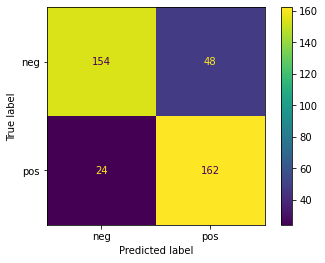

In [203]:
print(classification_report(y_test,preds))
plot_confusion_matrix(lr_model,X_test,y_test)

Trying SVC

In [204]:
from sklearn.svm import LinearSVC

In [205]:
svc = LinearSVC()

              precision    recall  f1-score   support

         neg       0.85      0.77      0.81       202
         pos       0.78      0.85      0.81       186

    accuracy                           0.81       388
   macro avg       0.81      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



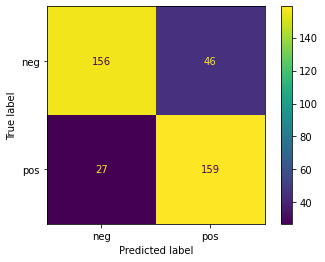

In [206]:
svc.fit(X_train,y_train)
svc_preds = svc.predict(X_test)
print(classification_report(y_test,svc_preds))
plot_confusion_matrix(svc,X_test,y_test)

both the models gave similiar accuracy scores
---
## Model deployment

In [207]:
from sklearn.pipeline import Pipeline

In [208]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [209]:
pipe.fit(df['review'],df['label'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [210]:
new_review = ['bad film']
pipe.predict(new_review)

array(['neg'], dtype=object)